Basemap Tutorial
=====

The Basemap package extends Matplotlib's fuctionality to include various map-drawing utilities. This tutorial covers some of its basic functionality, with the ultimate goal of creating a map that shows some cities that visited on a trip I took.

In [49]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# As I'm writing this, Basemap uses some deprecated functions
# These generate a ton of warnings, so I'm turning them off here
import warnings
warnings.filterwarnings('ignore')

Okay, what we need now is some data. For this map, I want to plot cities that I visited as points on a map, and flights I took as arcs connecting some of those cities. These require slightly different handling, so we'll create two arrays:

In [50]:
coord_list = [
    # Format (city, latitude, longitude)
    # We don't need to store the city names
    # They're included for readability and to make changes easier
    ('new_york_city', 40.78, -73.98),
    ('bet_shemesh', 31.75, 34.99),
    ('tel_aviv', 32.07, 34.76),
    ('london', 51.51, -0.13),
    ('york', 53.96, -1.09),
    ('edinburgh', 55.95, -3.19),
    ('glasgow', 55.86, -4.25),
    ('belfast', 54.59, -5.93),
    ('pisa', 43.76, 10.38),
    ('florence', 43.77, 11.25),
    ('rome', 41.9, 12.50)
]

flight_list = [
    ('new_york_city', 40.78, -73.98),
    ('bet_shemesh', 31.75, 34.99),
    ('tel_aviv', 32.07, 34.76),
    ('london', 51.51, -0.13),
    ('london', 51.51, -0.13),
    ('pisa', 43.76, 10.38)
]

Time to get mapping! First, a little housekeeping to set up the Matplotlib figure, and then the first iteration of the actual map:

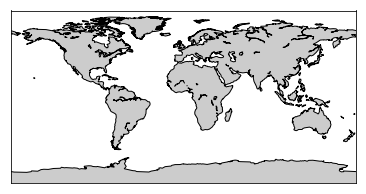

In [51]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

m = Basemap()
m.drawcoastlines();
m.fillcontinents();

By default, calling `Basemap()` gives us a grayscale map of the entire world. The arguments that Basemap requires depend primarily on the *projection* you want to use for your map. Basemap supports a wide variety of them, listed [here](https://matplotlib.org/basemap/api/basemap_api.html). The default is 'cyl', the [equidistant cylindrical projection](https://en.wikipedia.org/wiki/Equirectangular_projection), which we're looking at here.

`drawcoastlines` adds the outlines of continents and landlocked bodies of water, and `fillcontinents` colors the continents in. By default the continent fill is gray, but you can pass in any color you like with the `color` parameter.

The output of this command shows the whole globe, which is fine for the map I'd want to make showing my entire trip. For this subset of the data, though, it makes more sense to focus in on a smaller area:

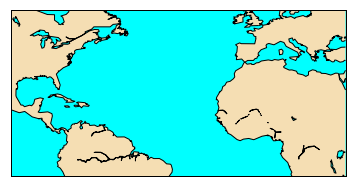

In [60]:
m = Basemap(llcrnrlon=-100.,llcrnrlat=-10.,urcrnrlon=35.,urcrnrlat=57.,
            projection='cyl',
            resolution ='c')

m.drawmapboundary(fill_color='aqua')
m.drawcoastlines();
m.fillcontinents(color='wheat', lake_color='aqua');

The `projection` and `resolution` arguments in the `Basemap` call simply spell out the defaults. Projections are touched on above, and the `resolution` parameter determines the level of detail used in drawing coastlines and other topographical features. Crude, 'c', is the lowest possible value, but perfectly adequate for the birds-eye map we're working with here.

To define the area of the globe that we want to show, we define the lower-left and upper-right corners of a box to be drawn on the globe. `llcrnrlon` is the lower-left corner's longitude, and `llcrnrlat` is its latitude; `urcrnrlon` and `urcrnrlat` are, likewise, the longitude and latitude of the upper-right corner.

The `drawmapboundary` function is what will draw a line around the map region and allow us to fill the background in with a color, thus creating oceans. `fillcontinents` also takes color arguments for both the color of the landmasses and interior bodies of water.

Now, let's add some data!

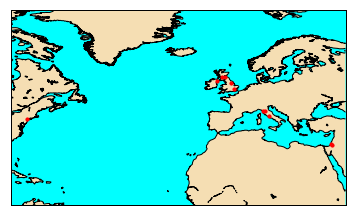

In [38]:
m = Basemap(llcrnrlon=-80.,llcrnrlat=10.,urcrnrlon=40.,urcrnrlat=80.,
            projection='cyl',
            resolution ='l')

m.scatter([coords[2] for coords in coord_list], [coords[1] for coords in coord_list], 10, latlon=True, marker='o', color='red', zorder=10)
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines();
m.fillcontinents(color='wheat', lake_color='aqua');

The `scatter` function adds points to the map. It takes a sequence of longitudes and a sequence of latitudes to plot, which means creating a couple quick lists out of our coordinate data. We use `latlon` to indicate that the coordinates are in fact being given in terms of latitude and longitude, which means they'll be automatically adjusted as necessary to account for the chosen map projection. Marker styles, color, and so on are set in the same way as they are in [Matplotlib's `scatter` function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). It's important to set a positive `zorder` value if you have any points that need to appear on top of landmasses (all of our points, in this case)--by default scatter points have a lower index than the continents drawn on the map, so they'll be hidden beneath them!

Now let's add some arcs to the map representing flights between cities. We'll use the `drawgreatcircle` function for this:

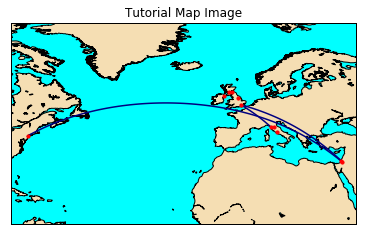

In [57]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

m = Basemap(llcrnrlon=-80.,llcrnrlat=10.,urcrnrlon=40.,urcrnrlat=80.,
            projection='cyl',
            resolution ='l')

m.scatter([coords[2] for coords in coord_list], [coords[1] for coords in coord_list], 10, latlon=True, marker='o', color='red', zorder=10)

for start, end in zip(flight_list[0::2], flight_list[1::2]):
        m.drawgreatcircle(start[2], start[1], end[2], end[1], linewidth=1.5, color='navy')

m.drawmapboundary(fill_color='aqua')
m.drawcoastlines();
m.fillcontinents(color='wheat', lake_color='aqua');
ax.set_title('Tutorial Map Image');

Easy enough. Drawing arcs in Basemap requires the `drawgreatcircle` function, which takes the longitude/latitude of the starting point and the longitude/latitude of the ending point, and the usual arguments associated with lines in Matplotlib. Add a title with `set_title` (which also requires moving the `add_axes` call to this code block), and the map's more or less good to go!

When I was originally thinking about this project, though, I was actually envisioning a map that would be more like points superimposed on a sattelite image, putting more emphasis on the different kinds of terrain I'd covered. Basemap can do that, too! Rather than drawing coastlines, filling continents, and so on, we have the option of using one of [NASA's Blue Marble images](https://visibleearth.nasa.gov/view_cat.php?categoryID=1484) as a background:

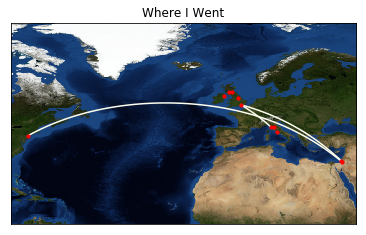

In [59]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

m = Basemap(llcrnrlon=-80.,llcrnrlat=10.,urcrnrlon=40.,urcrnrlat=80.,
            projection='cyl',
            resolution = None)

m.scatter([coords[2] for coords in coord_list], [coords[1] for coords in coord_list], 10, latlon=True, marker='o', color='red', zorder=10)

for start, end in zip(flight_list[0::2], flight_list[1::2]):
        m.drawgreatcircle(start[2], start[1], end[2], end[1], linewidth=1.5, color='ivory')

m.bluemarble(scale=0.5);
ax.set_title('Where I Went');

Just what I was looking for!

Taking this approach requires only a couple changes to the code. The `drawboundaries`, `fillcontinents`, and similar calls are replaced with a single call to `bluemarble`, which draws the whole background. The `scale` parameter is very important, as it essentially sets the resolution of the map. By default, the image used is 5400 x 2700 pixels, which repeatedly hung my laptop and will, in general, take much longer to draw. Setting the scale to a value less than one will downsample the image, here to 50% of the original resolution. Meanwhile, the actual `resolution` parameter in the call to `Basemap` is set to `None`, which is fine, since we aren't drawing any coastlines, etc. on this map anyway, and this also saves on computation time.

This is only a tiny subset of Basemap's functionality, but hopefully it gives you an idea of the basics. The [Basemap example gallery](https://matplotlib.org/basemap/users/examples.html) is worth checking out for a look at to get an idea of the package's capabilities. Happy plotting!